<a href="https://colab.research.google.com/github/tabjun/image-data-study/blob/main/Face_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Detection

![](https://mediapipe.dev/images/mobile/face_detection_android_gpu.gif)



## 미디어파이프 설치

https://google.github.io/mediapipe/solutions/face_detection.html

In [ ]:
!pip install -q mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.6/33.6 MB 45.8 MB/s eta 0:00:00


## 패키지 로드

In [ ]:
import mediapipe as mp
import cv2
from google.colab.patches import cv2_imshow

## 사진 다운로드

https://www.pexels.com/ko-kr/photo/50692/

In [ ]:
img = cv2.imread('02.jpg')

cv2_imshow(img)

In [ ]:
img


array([[[176, 169, 154],
        [176, 169, 154],
        [163, 151, 141],
        ...,
        [141, 156, 159],
        [141, 153, 157],
        [142, 154, 156]],

       [[210, 206, 195],
        [209, 203, 192],
        [182, 173, 164],
        ...,
        [120, 135, 138],
        [124, 136, 140],
        [132, 144, 148]],

       [[224, 223, 219],
        [212, 211, 207],
        [208, 205, 201],
        ...,
        [126, 141, 144],
        [122, 136, 142],
        [128, 142, 148]],

       ...,

       [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128]],

       [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128]],

       [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128]]

## 얼굴 탐지 모델 로드

**min_detection_confidence(Threshold, 임계치)**

0~1 사이 소수점 값을 가지며 높을 수록 더 정확해지지만 얼굴을 탐지 못할 경우 발생 (탐지 결과에서 score로 표시)

In [ ]:
mp_face_detection = mp.solutions.face_detection

mp_drawing = mp.solutions.drawing_utils
drawing_spec = mp_drawing.DrawingSpec()

face_detection = mp_face_detection.FaceDetection(
    min_detection_confidence=0.7)

## 모델 추론

![](https://i.imgur.com/nK8bP2o.png)

In [ ]:
results = face_detection.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

print(results.detections)

[label_id: 0
score: 0.9258034825325012
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.505081832408905
    ymin: 0.3554378151893616
    width: 0.15369051694869995
    height: 0.23053640127182007
  }
  relative_keypoints {
    x: 0.5367897152900696
    y: 0.4161720871925354
  }
  relative_keypoints {
    x: 0.6001759767532349
    y: 0.43540865182876587
  }
  relative_keypoints {
    x: 0.5520027875900269
    y: 0.48727917671203613
  }
  relative_keypoints {
    x: 0.5524255037307739
    y: 0.5295778512954712
  }
  relative_keypoints {
    x: 0.5169850587844849
    y: 0.41510820388793945
  }
  relative_keypoints {
    x: 0.6550896763801575
    y: 0.45408350229263306
  }
}
]


## 이미지에 결과 표시

In [ ]:
result_img = img.copy()

if results.detections:
    for detection in results.detections:
        mp_drawing.draw_detection(result_img, detection)
else:
    print('얼굴이 검출되지 않았습니다!')

cv2_imshow(result_img)

## 얼굴 영역 추출 및 이미지 저장

In [ ]:
img.shape # (높이, 너비, 채널)

(3600, 5400, 3)

In [ ]:
img.shape[1]

1280

In [ ]:
box = detection.location_data.relative_bounding_box

int(box.xmin * img.shape[1])

374

In [ ]:
max(-200, 0)

0

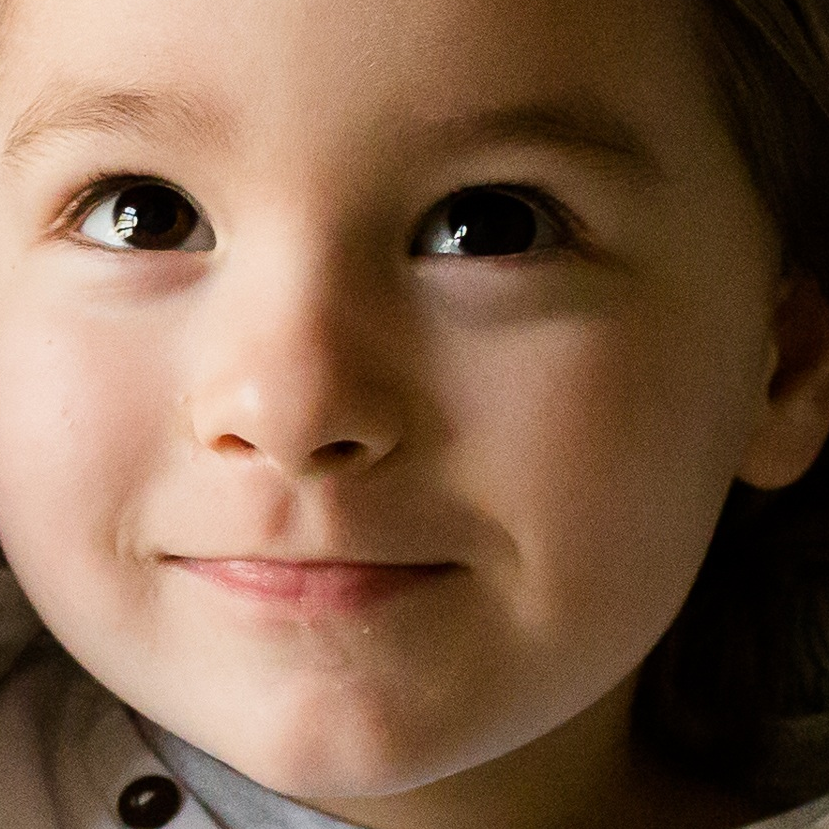

In [ ]:
if results.detections:
    for i, detection in enumerate(results.detections):
        box = detection.location_data.relative_bounding_box

        xmin = max(int(box.xmin * img.shape[1]), 0)
        ymin = max(int(box.ymin * img.shape[0]), 0)
        width = int(box.width * img.shape[1])
        height = int(box.height * img.shape[0])

        face_img = img[ymin:ymin + height, xmin:xmin + width]

        cv2_imshow(face_img)

        num = str(i).zfill(3)

        cv2.imwrite(f'face_{num}.jpg', face_img)

## video 를 이용

https://www.pexels.com/search/videos/face/


In [ ]:
import numpy as np
video_path = 'video.mp4'

cap = cv2.VideoCapture(video_path)

fourcc = cv2.VideoWriter_fourcc('F','M','P','4')
out = cv2.VideoWriter('output.mp4', fourcc, cap.get(cv2.CAP_PROP_FPS), (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

while cap.isOpened():
    ret, img_ori = cap.read()

    if not ret:
        break

    img = img_ori.copy()
    results = face_detection.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    if results.detections:
      for detection in results.detections:
        mp_drawing.draw_detection(img, detection)

        out.write(img)
        #cv2_imshow(img)


out.release()
cap.release()

In [ ]:
!ls -al
